In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read data

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
start_from = '2020-02-20'

df = pd.read_csv(url)
df['data'] = [x.split()[0] for x in df['data']]

# start from selected day
d = (df['data'] == start_from).idxmax()
df = df.iloc[d:, :]

df['denominazione_regione'].unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

# Variabile da visualizzare  

In [3]:
# 'data', 'ricoverati_con_sintomi', 'terapia_intensiva','totale_ospedalizzati',
# 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi',
# 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati'

col = ['terapia_intensiva']

# Regioni da monitorare

In [4]:
# 'Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna','Friuli Venezia Giulia',
# 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'P.A. Bolzano', 'P.A. Trento',
# 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto'

lista_regioni = ['Lombardia', 'Campania', 'Veneto']

# Plot 

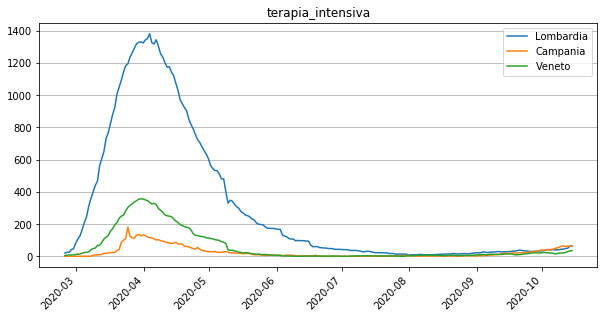

In [6]:
t = pd.to_datetime(df.data)

fig, ax = plt.subplots(1,1,figsize=[10,5])

for regione in lista_regioni:
    df_view = df.loc[df.denominazione_regione == regione,:]
    ax.plot(pd.to_datetime(df_view.data), df_view[col], label=regione)

fig.autofmt_xdate(rotation=45)    
ax.grid(axis='y')

plt.legend()
plt.title(col[0]);